In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
tf.__version__

'2.18.0'

In [3]:
train_dategen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                    zoom_range = 0.2,
                                     horizontal_flip = True )

In [4]:
training_set = train_dategen.flow_from_directory(r"E:\Academics\Notes\Deep Learning\Batch 103 Day 51\CNN dataset\training_set",
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = "binary")

Found 8000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
test_set = test_datagen.flow_from_directory(r"E:\Academics\Notes\Deep Learning\Batch 103 Day 51\CNN dataset\test_set",
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 2000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers, models, Sequential
cnn = Sequential()
cnn


<Sequential name=sequential, built=False>

In [8]:
cnn.add(layers.Input(shape=[64, 64, 3]))  # Define input shape explicitly
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))

In [9]:
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(layers.Flatten())

In [12]:
cnn.add(layers.Dense(units=128, activation="relu"))

In [13]:
cnn.add(layers.Dense(units=1, activation="sigmoid"))

In [14]:
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
cnn.fit(x = training_set, validation_data=test_set, epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 186ms/step - accuracy: 0.9625 - loss: 0.0998 - val_accuracy: 0.7935 - val_loss: 0.8491
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 182ms/step - accuracy: 0.9560 - loss: 0.1112 - val_accuracy: 0.8000 - val_loss: 0.8165
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.9638 - loss: 0.0969 - val_accuracy: 0.7910 - val_loss: 0.8780
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 177ms/step - accuracy: 0.9641 - loss: 0.0981 - val_accuracy: 0.8035 - val_loss: 0.8069
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 176ms/step - accuracy: 0.9679 - loss: 0.0864 - val_accuracy: 0.7955 - val_loss: 0.8582
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.9723 - loss: 0.0753 - val_accuracy: 0.7895 - val_loss: 0.9512
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 176ms/step - accuracy: 0.9657 - loss: 0.0888 - val_accuracy: 0.7955 - val_loss: 0.8600
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 174ms/step - accuracy: 0.9652 - loss: 0

In [22]:
import numpy as np
import tensorflow.keras.utils as image 

In [23]:
test_image = image.load_img(r"E:\Academics\Notes\Deep Learning\Batch 103 Day 51\CNN dataset\single_prediction\cat_or_dog_1.jpg", target_size=(64,64))

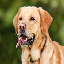

In [24]:
test_image

In [25]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = "dog"
else:
    prediction = "cat"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


In [26]:
prediction

'dog'

In [27]:
test_image2 = image.load_img(r"E:\Academics\Notes\Deep Learning\Batch 103 Day 51\CNN dataset\single_prediction\cat_or_dog_2.jpg", target_size=(64,64) )

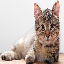

In [28]:
test_image2

In [29]:
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis=0)
result = cnn.predict(test_image2)
training_set.class_indices
if result[0][0] == 1:
    prediction = "dog"
else:
    prediction = "cat"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [30]:
prediction

'cat'

In [31]:
test_image3 = image.load_img(r"E:\Academics\Notes\Deep Learning\Batch 103 Day 51\CNN dataset\single_prediction\cat_or_dog_3.jpg", target_size=(64,64))

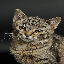

In [32]:
test_image3

In [33]:
test_image3 = image.img_to_array(test_image3)
test_image3 = np.expand_dims(test_image3, axis=0)
result = cnn.predict(test_image3)
training_set.class_indices
if result[0][0] == 1:
    prediction = "dog"
else:
    prediction = "cat"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [34]:
prediction

'cat'